# FMCW Radar 101 - Intro

Goal:

> Explicit in one single place code and maths needed to understand FMCW radar.

Status:

* this work book runs in any browser and correctly computes distance and speed for a single target.

Howto:

> you can start with the maths or with the code, you should finish the otherway round and check they both match.

1. if needed check the introduction to Google Colab to run notebooks in your web browser [here](https://colab.research.google.com/)

2. Navigate to the cell you want to execute and press execute
3. make changes to chirp ramp-time, distances, speeds and observe the changes (keep in mind that all measures are related to the FFT bin sizes).

Next:

* click to access other workbooks:
  * [FMCW 102 - CFAR](https://colab.research.google.com/gist/matt-chv/33e98a23d4b9d90dd27c1bf7f0a54781/fmcw-radar-102-cfar.ipynb) : CFAR or how to detect objects of interest from range FFT.
  * [FMCW 103 - AoA](https://colab.research.google.com/gist/matt-chv/d81f7e2166009a623a36781a0773ae47/fmcw-radar-103-aoa.ipynb) : angle of arrival (CAPON vs Bartlett)
  * [FMCW 104 - increased resolution vs FFT bin](https://colab.research.google.com/gist/matt-chv/0b25dbc4673f2d7d63804cc6241643b9/fmcw-radar-104-1-fft-freq-estimation.ipynb)increase accuracy option compared to standard FFT.
  * Also available on github as gist for forking:
    * [fmcw 101](https://gist.github.com/matt-chv/bdd8b835c5cb7e739bb8b68d00257690)
    * [fmcw 102](https://gist.github.com/matt-chv/33e98a23d4b9d90dd27c1bf7f0a54781)
    * ...

History:

* 2022-Dec-28: Added 2D FFT - 3 targets - 2 targets same range, 2 same speed
* 2022-Dec-23: Added 2D FFT example - 1 targets
* 2022-Dec-15: Clean-up to have MRE for range and speed as standalone cells
* 2022-Apr-28: creation

Related ressources:

* How to run a google Colab notebook (requires a Google account to login): [Colab intro](https://colab.research.google.com/)
* OpenRadar notebook on range: [Range example](https://github.com/PreSenseRadar/OpenRadar/blob/master/Presense%20Applied%20Radar/basics/Range%20-%20COMPLETED.ipynb)





## FMCW Maths 101


### linear chirps and IF frequencies

Signal model
According to (Barriok 1973; Stove 1992; Komarov and Smolskiy 2003; Winkler 2007) the
transmitted signal of an FMCW radar system can be modeled as
where

$$ y_T (t) = A_T \cdot cos\left( 2 \pi \cdot ( f_{0min} \cdot t +\int_0^tf_T({\tau}) d\tau)\right)$$

Given for a linear chirp that
$$ f_T(\tau) = \frac{B}{T} \cdot \tau = s \cdot \tau $$
We derive the phase, given
$$ \int_0^t f_T({\tau}) d\tau = \frac{s}{2} \cdot \tau^2 - K$$

which can be written as:
$$ y_T (t) = A_T \cdot cos \left( 2 \pi \cdot ( f_{0min} \cdot t + \frac{s}{2} \cdot t^2 )+\Phi_0 \right) $$

Where:
* $ f_{0min} $ is the start frequency at the begining of the raising frequency of the chirp.
* s is the slope at which the frequency is ramped ( $ S = \frac{B}{T} $)
* B is the total bandwdith of the chirp
* T is the total time of the chirp

Considering a reflected signal with a time delay $ \delta = 2 · \frac{R0+ v\cdot t}{c} $ and Doppler shift $ f_D = −2 · \frac{f_c \cdot v}{c} $

Where:

* c is the speed of light
* $ f_D $ is the doppler shift
* R0 is the nominal distance to the target
* $ \delta $ is the time of flight (to and from the target)
* v is the velocity of the target

The receive signal $ y_R(t) $ can be written as :

$$ y_R(t) = A_R \cdot cos ( 2\pi \cdot (f_{0min} + \frac{s}{2} \cdot (t-\delta)) \cdot (t-\delta)) $$


$ y_{IF}(t) $ is the IF signal (after mixer) which is obtained by multiplication in the time domain, and passed to a low-pass filter (LPF)

This can be done easily when remembering the trigonometric relation:

$$ cos(\alpha) \cdot cos(\beta) = \frac{cos(\alpha + \beta) + cos(\alpha - \beta)}{2} $$

$$ y_{IF}(t) = y_R(t) \cdot y_T(t) $$

Noticing that the element which sums the elements will be higher frequency and will be filtered by the LPF, it remains that:

$$ y_{IF}(t) = \frac{A_t \cdot A_r}{2} \cdot cos(2 \pi \cdot [f_{0min} \cdot \delta + s \cdot \delta \cdot t - \frac{s}{2} \cdot \delta^2])$$

Where:

* $ f_{0min} $ the starting frequency of the chirp
* s is the slope of the chirp
* $\delta $ is the total time of flight between antennas and target
* At, Ar: Amplitude of the RX and TX waves

## phase information

$$ y_{IF}(t) = \frac{A_t \cdot A_r}{2} \cdot cos(2 \pi \cdot [f_{0min} \cdot \delta + s \cdot \delta \cdot t - \frac{s}{2} \cdot \delta^2])$$

could also be written as

$$ y_{IF}(t) = A_{IF} \cdot e^{j \cdot \Phi(t)} $$

with
$$ \Phi(t) = 2 \cdot \pi \cdot [f_{0min} \cdot \delta + s \cdot \delta \cdot t - \frac{s}{2} \cdot \delta^2] $$

let's say $$ \Phi_0 = \Phi(\tau) $$ and
$\Delta t $ later
$$ \Phi_1 = \Phi(\tau+\Delta t) $$

$$ \Delta \Phi = \Phi_1 - \Phi_0$$
$$ \iff $$
$$ \Delta \Phi = \Phi_1 - \Phi_0 = f_0⋅\Delta t−K \cdot \Delta t−K\tau \cdot \Delta t-\frac{K}{2}\Delta t^2 $$

which can be simplified as
$$ \Delta \Phi = 2 \cdot \pi \cdot f \cdot \Delta t $$
with $ c= \lambda \cdot f $

$$ \Delta \Phi = 4 \cdot \pi \cdot \frac{v \cdot T_c}{\lambda} $$

More ressources:
* Eq 8 [FMCW Radar system](https://uwaterloo.ca/centre-for-intelligent-antenna-and-radio-systems/sites/ca.centre-for-intelligent-antenna-and-radio-systems/files/uploads/files/fmcwradarsystem.pdf)
* Eq 7, 10 [spyy005 on ti.com](https://www.ti.com/lit/wp/spyy005a/spyy005a.pdf)
* Eq 1, 2, 3, 4 [Design of an FMCW radar baseband
signal processing system for automotive
application](https://link.springer.com/content/pdf/10.1186/s40064-015-1583-5.pdf)
* Eq 2.7 in [Object Detection with
Automotive Radar
Sensors using CFARAlgorithms](https://www.jku.at/fileadmin/gruppen/183/Docs/Finished_Theses/Bachelor_Thesis_Katzlberger_final.pdf)

### Distance from IF FFT

### Speed from IF FFT

## Minimum Reproductible Examples

Below is code generating IF for single target and using the IF to comupte distance and speed.



## Distance

In [ ]:
from numpy import abs ,angle, arange, arcsin, cos, linspace, pi, sqrt, tan
from scipy.fft import fft

def y_IF(f0_min, slope, T, antenna_tx, antenna_rx, target, v=3e8):
  """ This function implements the mathematical IF defined in latex as
    y_{IF} = cos(2 \pi [f_0\delta + s * \delta * t - s/2* \delta^2])
  into following python code
  y_IF = cos (2*pi*(f_0 * delta + slope * delta * T - slope/2 * delta**2))
  Parameters:
  -----------
  f0_min: float
    the frequency at the begining of the chirp
  slope: float
    the slope with which the chirp frequency inceases over time
  T: ndarray
    the 1D vector containing time values
  antenna_tx: tuple of floats
    x, y, z coordinates
  antenna_rx: tuple of floats
    x, y, z coordinates
  target: tuple of floats
    x, y, z coordinates
  v: float
    speed of light in considered medium
  Returns:
  --------
  YIF: ndarray
    vector containing the IF values
  """
  tx_x, tx_y, tx_z = antenna_tx
  rx_x, rx_y, rx_z = antenna_rx
  t_x, t_y, t_z = target
  # distance tx antenna to target
  distance = sqrt((tx_x-t_x)**2 + (tx_y-t_y)**2 + (tx_z-t_z)**2)
  # distance target to rx antenna
  distance += sqrt((rx_x-t_x)**2 + (rx_y-t_y)**2 + (rx_z-t_z)**2)
  # usually delta_t = 2*d/c, but
  # distance is already 2*D (TX to target + distance target to RX)
  # so delta = distance/v
  delta = distance/v
  YIF = cos(2 *pi *(f0_min * delta + slope * delta * T - slope/2 * delta**2))
  return YIF

f0_min = 60e9
c = 3e8
# lambda ~5mm at 60GHz
lambda0_max = 3e8/f0_min
n_rx = 2
Distance = 10
k = 10e12
n_samples = 512
f_if = 2*k*Distance/c
fs = 50e6
ts = 1/fs

# antenna_tx = (-lambda0_max/2,0,0)
antenna_tx = (0,0,0)
antenna_rx = (0,0,0)
T = arange(0, n_samples*ts+ts, ts)

for d in [12, 21, 40]:
  target = (0, d, 0)

  # sanity check
  f_if = 2*k*d/c
  assert f_if < fs/2

  YIF = y_IF(f0_min, k, T, antenna_tx, antenna_rx, target)
  FT = fft(YIF)
  MAG = abs(FT)[0: n_samples//2]
  ANG = angle(FT)[0: n_samples//2]

  # now find the peak
  amplitude_peak = sorted(MAG, reverse = True)[0]
  i_peak = list(MAG).index(amplitude_peak)
  # max un-ambiguous speed is fs*c/2/k
  distances = linspace(0, fs*c/2/k, n_samples)
  d_calc = distances[i_peak]
  print(f"target at:{d:.2g} is computed to be at {d_calc:.2g}")

target at:12 is computed to be at 12
target at:21 is computed to be at 21
target at:40 is computed to be at 40


## Speed w/ phase (no FFT)

In [ ]:
from numpy import abs ,angle, arange, arcsin, cos, pi, sqrt, tan
from scipy.fft import fft

def y_IF(f0_min, slope, T, antenna_tx, antenna_rx, target, v=3e8):
  """ This function implements the mathematical IF defined in latex as
    y_{IF} = cos(2 \pi [f_0\delta + s * \delta * t - s/2* \delta^2])
  into following python code
  y_IF = cos (2*pi*(f_0 * delta + slope * delta * T - slope/2 * delta**2))
  Parameters:
  -----------
  f0_min: float
    the frequency at the begining of the chirp
  slope: float
    the slope with which the chirp frequency inceases over time
  T: ndarray
    the 1D vector containing time values
  antenna_tx: tuple of floats
    x, y, z coordinates
  antenna_rx: tuple of floats
    x, y, z coordinates
  target: tuple of floats
    x, y, z coordinates
  v: float
    speed of light in considered medium
  Returns:
  --------
  YIF: ndarray
    vector containing the IF values
  """
  tx_x, tx_y, tx_z = antenna_tx
  rx_x, rx_y, rx_z = antenna_rx
  t_x, t_y, t_z = target
  # distance tx antenna to target
  distance = sqrt((tx_x-t_x)**2 + (tx_y-t_y)**2 + (tx_z-t_z)**2)
  # distance target to rx antenna
  distance += sqrt((rx_x-t_x)**2 + (rx_y-t_y)**2 + (rx_z-t_z)**2)
  # usually delta_t = 2*d/c, but
  # distance is already 2*D (TX to target + distance target to RX)
  # so delta = distance/v
  delta = distance/v
  YIF = cos(2 *pi *(f0_min * delta + slope * delta * T - slope/2 * delta**2))
  return YIF

f0_min = 60e9
c = 3e8
# lambda ~5mm at 60GHz
lambda0_max = 3e8/f0_min
n_rx = 2
Distance = 10
k = 10e12
n_samples = 512
f_if = 2*k*Distance/c
fs = 50e6
ts = 1/fs

antenna_tx = (0,0,0)
antenna_rx = (0,0,0)
T = arange(0, n_samples*ts+ts, ts)
t_chirp_to_chirp = 1.2e-6
print("if we computed speed with FFT:")
print(f"speed resolution: {lambda0_max/(2*t_chirp_to_chirp):.2g}")
print(f"v_max: {lambda0_max/(4*t_chirp_to_chirp):.2g}")

for d in [10]:
  for v in [100, 200, 300]:
    target_t0 = (d, 0, 0)
    f_if = 2*k*d/c
    # sanity check
    assert f_if < 1/ts/2

    YIF0 = y_IF(f0_min, k, T, antenna_tx, antenna_rx, target_t0)

    target_t1 = (d+v*t_chirp_to_chirp, 0, 0)
    YIF1 = y_IF(f0_min, k, T, antenna_tx, antenna_rx, target_t1)

    # since we have a real FFt, only want to see the first peak
    FT0 = fft(YIF0[:n_samples//2])
    FT1 = fft(YIF1[:n_samples//2])
    MAG0 = abs(FT0)
    amplitude_peak0 = sorted(MAG0, reverse = True)[0]
    i_peak0 = list(MAG0).index(amplitude_peak0)

    MAG1 = abs(FT1)
    amplitude_peak1 = sorted(MAG1, reverse = True)[0]
    i_peak1 = list(MAG1).index(amplitude_peak1)
    assert i_peak0 == i_peak1

    ANG0 = angle(FT0)
    ANG1 = angle(FT1)

    ph0 = ANG0[i_peak0]
    ph1 = ANG1[i_peak1]
    # d, v, ph0 10 100.0 -1.5646604036459237 -1.2627114022166515
    v_est = lambda0_max*(ph1-ph0)/(4*pi*t_chirp_to_chirp)
    print(f"speed is:{v:.2g} is computed to be at {v_est:.2g}")

if we computed speed with FFT:
speed resolution: 2.1e+03
v_max: 1e+03
speed is:1e+02 is computed to be at 1.1e+02
speed is:2e+02 is computed to be at 2.2e+02
speed is:3e+02 is computed to be at 3.4e+02


## Range-Doppler FFT (2D FFT)

512


Text(0.5, 1.0, 'Velocity-Range 2D FFT')

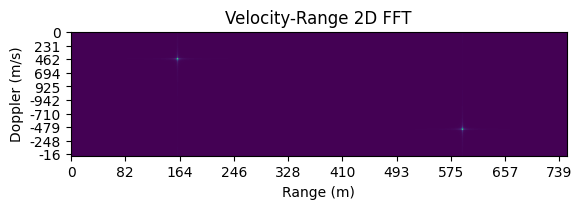

In [ ]:
from numpy import abs ,angle, arange, arcsin, cos, concatenate, pi, sqrt, tan, zeros, linspace
from scipy.fft import fft, fft2
import matplotlib.pyplot as plt


def y_IF(f0_min, slope, T, antenna_tx, antenna_rx, target, v=3e8):
  """ This function implements the mathematical IF defined in latex as
    y_{IF} = cos(2 \pi [f_0\delta + s * \delta * t - s/2* \delta^2])
  into following python code
  y_IF = cos (2*pi*(f_0 * delta + slope * delta * T - slope/2 * delta**2))
  Parameters:
  -----------
  f0_min: float
    the frequency at the begining of the chirp
  slope: float
    the slope with which the chirp frequency inceases over time
  T: ndarray
    the 1D vector containing time values
  antenna_tx: tuple of floats
    x, y, z coordinates
  antenna_rx: tuple of floats
    x, y, z coordinates
  target: tuple of floats
    x, y, z coordinates
  v: float
    speed of light in considered medium
  Returns:
  --------
  YIF: ndarray
    vector containing the IF values
  """
  tx_x, tx_y, tx_z = antenna_tx
  rx_x, rx_y, rx_z = antenna_rx
  t_x, t_y, t_z = target
  # distance tx antenna to target
  distance = sqrt((tx_x-t_x)**2 + (tx_y-t_y)**2 + (tx_z-t_z)**2)
  # distance target to rx antenna
  distance += sqrt((rx_x-t_x)**2 + (rx_y-t_y)**2 + (rx_z-t_z)**2)
  # usually delta_t = 2*d/c, but
  # distance is already 2*D (TX to target + distance target to RX)
  # so delta = distance/v
  delta = distance/v
  YIF = cos(2 *pi *(f0_min * delta + slope * delta * T - slope/2 * delta**2))
  return YIF

f0_min = 60e9
c = 3e8
# lambda ~5mm at 60GHz
lambda0_max = 3e8/f0_min
n_rx = 2
Distance = 10
k = 10e12
n_samples = 512
f_if = 2*k*Distance/c
fs = 50e6
ts = 1/fs

antenna_tx = (-lambda0_max/2,0,0)
antenna_rx = (0,0,0)
T = arange(0, n_samples*ts, ts)
t_chirp_to_chirp = 1.2e-6
n_chirps = 128
print(len(T))

cube2D = zeros((n_chirps, n_samples))
for d in [160]:
  for v in [460]:
    for chirp_i in range(n_chirps):
      d_i = d + v*t_chirp_to_chirp*chirp_i
      f_if = 2*k*d_i/c
      target_t_i = (0, d_i, 0)

      # sanity check
      assert f_if < 1/ts/2
      assert v < lambda0_max/4/t_chirp_to_chirp

      YIFi = y_IF(f0_min, k, T, antenna_tx, antenna_rx, target_t_i)
      cube2D[chirp_i, :] = YIFi

Z_fft2 = abs(fft2(cube2D))

Data_fft2 = Z_fft2  # [0:n_chirps//2,0:n_samples//2]

# change scale for 2D plot
# range formula
# ranges from 0 to max distance with n_samples values
# max un-ambigous range is fs*c/2/k
ranges = linspace(0, fs*c/2/k, n_samples)
no_labels = 10 # how many labels to see on axis x
step_x = int(n_samples / (no_labels - 1)) # step between consecutive labels
x_positions = arange(0, n_samples, step_x) # pixel count at label position
x_labels = ranges[::step_x] # labels you want to see
# rounding up the values for easier display
x_labels = [int(d) for d in x_labels]
# allocate labels to ticks
plt.xticks(x_positions, x_labels)

# Max un-ambigous speed is lambda0_max/4/t_chirp_to_chirp
# if we `assume` no negative speed then
# Max non-un-ambiguous is 2x lambda0_max/4/t_chirp_to_chirp
# i.e. from 0 to 2x lambda0_max/4/t_chirp_to_chirp
# instead of [- lambda0_max/4/t_chirp_to_chirp ; lambda0_max/4/t_chirp_to_chirp]
no_labels_y = 10 # how many labels to see on axis x
step_y = int(n_chirps / (no_labels_y - 1)) # step between consecutive labels
no_negative_speeds = False
if no_negative_speeds:
    speeds = linspace(0, lambda0_max/4/t_chirp_to_chirp*2, n_chirps)
else:
    # labels as we haven't done freqshift
    speeds_pos = linspace(0, lambda0_max/4/t_chirp_to_chirp, n_chirps//2)
    speeds_neg = linspace(-lambda0_max/4/t_chirp_to_chirp, 0, n_chirps//2)
    speeds = concatenate((speeds_pos, speeds_neg))
y_positions = arange(0, n_chirps, step_y) # pixel count at label position
y_labels = speeds[::step_y] # labels you want to see
y_labels = [int(dop) for dop in y_labels]
plt.yticks(y_positions, y_labels)

# change scale for 2D plot

plt.imshow(Data_fft2)
plt.xlabel("Range (m)")
plt.ylabel("Doppler (m/s)")
plt.title('Velocity-Range 2D FFT')

## 2D FFT - 3 targets

> 3 targets 2 same range, 2 same speed

Text(0.5, 1.0, 'Velocity-Range 2D FFT')

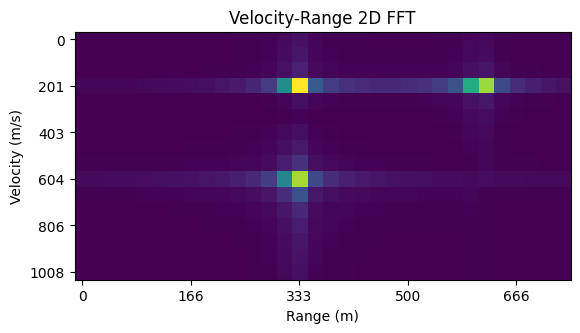

In [ ]:
from numpy import abs ,angle, arange, arcsin, cos, pi, sqrt, tan, zeros
from scipy.fft import fft, fft2
import matplotlib.pyplot as plt


def y_IF(f0_min, slope, T, antenna_tx, antenna_rx, target, v=3e8):
  """ This function implements the mathematical IF defined in latex as
    y_{IF} = cos(2 \pi [f_0\delta + s * \delta * t - s/2* \delta^2])
  into following python code
  y_IF = cos (2*pi*(f_0 * delta + slope * delta * T - slope/2 * delta**2))
  Parameters:
  -----------
  f0_min: float
    the frequency at the begining of the chirp
  slope: float
    the slope with which the chirp frequency inceases over time
  T: ndarray
    the 1D vector containing time values
  antenna_tx: tuple of floats
    x, y, z coordinates
  antenna_rx: tuple of floats
    x, y, z coordinates
  target: tuple of floats
    x, y, z coordinates
  v: float
    speed of light in considered medium
  Returns:
  --------
  YIF: ndarray
    vector containing the IF values
  """
  tx_x, tx_y, tx_z = antenna_tx
  rx_x, rx_y, rx_z = antenna_rx
  t_x, t_y, t_z = target
  # distance tx antenna to target
  distance = sqrt((tx_x-t_x)**2 + (tx_y-t_y)**2 + (tx_z-t_z)**2)
  # distance target to rx antenna
  distance += sqrt((rx_x-t_x)**2 + (rx_y-t_y)**2 + (rx_z-t_z)**2)
  # usually delta_t = 2*d/c, but
  # distance is already 2*D (TX to target + distance target to RX)
  # so delta = distance/v
  delta = distance/v
  YIF = cos(2 *pi *(f0_min * delta + slope * delta * T - slope/2 * delta**2))
  return YIF

f0_min = 60e9
c = 3e8
# lambda ~5mm at 60GHz
lambda0_max = 3e8/f0_min
n_rx = 2
Distance = 10
k = 10e12
n_samples = 64
f_if = 2*k*Distance/c
fs = 50e6
ts = 1/fs

antenna_tx = (-lambda0_max/2,0,0)
antenna_rx = (0,0,0)
T = arange(0, n_samples*ts, ts)
t_chirp_to_chirp = 1.2e-6
n_chirps = 32

# define empty 2D array to be filled by 2D FFT
cube2D = zeros((n_chirps, n_samples))

# define 3 targets
# one target is a 2-uple (distance, speed)
targets = [(160, 600),  (160, 200), (300, 200)]

for chirp_i in range(n_chirps):
  d0, v0 = targets[0]
  d0_t = d0 + v0*t_chirp_to_chirp*chirp_i

  d1, v1 = targets[1]
  d1_t = d1 + v1*t_chirp_to_chirp*chirp_i

  d2, v2 = targets[2]
  d2_t = d2 + v2*t_chirp_to_chirp*chirp_i

  f_if = 2*k*d0_t/c

  target_0_t = (0, d0_t, 0)
  target_1_t = (0, d1_t, 0)
  target_2_t = (0, d2_t, 0)

  # sanity check
  assert f_if < 1/ts/2
  assert v0 < lambda0_max/4/t_chirp_to_chirp

  YIFi0 = y_IF(f0_min, k, T, antenna_tx, antenna_rx, target_0_t)
  YIFi1 = y_IF(f0_min, k, T, antenna_tx, antenna_rx, target_1_t)
  YIFi2 = y_IF(f0_min, k, T, antenna_tx, antenna_rx, target_2_t)

  YIFi = YIFi0 + YIFi1 + YIFi2

  cube2D[chirp_i, :] = YIFi

Z_fft2 = abs(fft2(cube2D))

Data_fft2 = Z_fft2[0:n_chirps//2,0:n_samples//2]

# change scale for 2D plot to display range and velocity values
# https://stackoverflow.com/a/53746824
# range formula
ranges = linspace(0, fs*c/2/k *2, n_samples)
no_labels = 10 # how many labels to see on axis x
step_x = int(n_samples / (no_labels - 1)) # step between consecutive labels
x_positions = arange(0, n_samples, step_x) # pixel count at label position
x_labels = ranges[::step_x] # labels you want to see
x_labels = [int(x) for x in x_labels]
plt.xticks(x_positions, x_labels)

# we plot up to 2x max un-ambigous speed as we have no negative speeds
# to display so the positive speeds wrap-up and are displayed above
# the max un-ambigous speed
# hence speeds from 0 to max-speed *2
speeds = linspace(0, lambda0_max/4/t_chirp_to_chirp *2,
                n_chirps)
no_labels_y = 10 # how many labels to see on axis x
step_y = int(n_chirps / (no_labels_y - 1)) # step between consecutive labels
y_positions = arange(0, n_chirps, step_y) # pixel count at label position
y_labels = speeds[::step_y] # labels you want to see
y_labels = [int(y) for y in y_labels] # remove decimlas for cleaner plotting
plt.yticks(y_positions, y_labels)

# change scale for 2D plot

plt.imshow(Data_fft2)
plt.xlabel("Range (m)")
plt.ylabel("Velocity (m/s)")
plt.title('Velocity-Range 2D FFT')